In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from datetime import datetime, timedelta
from matplotlib.axes import Axes
import xesmf as xe
from scipy.interpolate import RegularGridInterpolator
from scipy import interpolate

/home/manmeet/anaconda3/envs/py35/lib/python3.7/site-packages/xarray/core/merge.py:16: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [68]:
data_dir = 'surface_restart.nc'
ds_surface_restart = xr.open_dataset(data_dir)

data_dir = 'sfc_ini_red.nc'
ds_sfc_ini_red = xr.open_dataset(data_dir)

data_dir = 'sfc_ini.nc'
ds_sfc_ini = xr.open_dataset(data_dir)

data_dir = 'grid_spec.nc'
ds_grid_spec = xr.open_dataset(data_dir)

data_dir = 'evavt_unpacked_1.nc'
ds_trans_era5 = xr.open_dataset(data_dir)

data_dir = 'snowc_unpacked_1.nc'
ds_snowcvr_era5 = xr.open_dataset(data_dir)

data_dir = 'FLDAS_NOAH01_C_GL_M.A198201.001.nc'
ds_merra5 = xr.open_dataset(data_dir)

data_dir = 'ocnanl.gdas.1979010100.ice_model.res.nc'
ds_ice = xr.open_dataset(data_dir)

data_dir = 'iicethic_ORAS5_1m_197901_icemod_02.nc'
ds_oras4 = xr.open_dataset(data_dir)

In [9]:
ds_surface_restart

<xarray.Dataset>
Dimensions:   (lat: 94, lev: 4, lon: 192)
Dimensions without coordinates: lat, lev, lon
Data variables:
    sheleg    (lat, lon) float64 ...
    snwdph    (lat, lon) float64 ...
    tskin     (lat, lon) float64 ...
    smc       (lev, lat, lon) float64 ...
    stc       (lev, lat, lon) float64 ...
    slc       (lev, lat, lon) float64 ...
    canopy    (lat, lon) float64 ...
    trans     (lat, lon) float64 ...
    sncovr    (lat, lon) float64 ...
    zorl_o    (lat, lon) float64 ...
    hice      (lat, lon) float64 ...
    hsnow     (lat, lon) float64 ...
    fwater    (lat, lon) float64 ...
    fice      (lat, lon) float64 ...
    tice_r    (lat, lon) float64 ...
    tice      (lat, lon) float64 ...
    twater_r  (lat, lon) float64 ...
    twater    (lat, lon) float64 ...

In [10]:
ds_sfc_ini_red

<xarray.Dataset>
Dimensions:  (Time: 1, xaxis_1: 192, yaxis_1: 94, zaxis_1: 1, zaxis_2: 4)
Coordinates:
  * xaxis_1  (xaxis_1) float64 1.0 2.0 3.0 4.0 5.0 ... 189.0 190.0 191.0 192.0
  * yaxis_1  (yaxis_1) float64 1.0 2.0 3.0 4.0 5.0 ... 90.0 91.0 92.0 93.0 94.0
  * zaxis_1  (zaxis_1) float64 1.0
  * zaxis_2  (zaxis_2) float64 1.0 2.0 3.0 4.0
  * Time     (Time) float64 1.0
Data variables:
    slmsk    (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    orog     (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    tsea     (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    sheleg   (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    tg3      (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    zorl     (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    alvsf    (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    alvwf    (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    alnsf    (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    alnwf    (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    vfrac    (Tim

In [11]:
ds_grid_spec

<xarray.Dataset>
Dimensions:         (gridlat_c: 200, gridlat_t: 200, gridlat_vert_c: 201, gridlat_vert_t: 201, gridlon_c: 360, gridlon_t: 360, gridlon_vert_c: 361, gridlon_vert_t: 361, i_atmXlnd: 7340, i_atmXocn: 112872, i_lndXocn: 112872, xba: 193, xbl: 193, xta: 192, xtl: 192, xto: 360, yba: 95, ybl: 95, yta: 94, ytl: 94, yto: 200, zt: 50, zw: 50)
Coordinates:
  * gridlat_c       (gridlat_c) float32 -81.0 -80.0 -79.0 ... 88.0 89.0 90.0
  * gridlat_t       (gridlat_t) float32 -81.5 -80.5 -79.5 ... 87.5 88.5 89.5
  * gridlat_vert_c  (gridlat_vert_c) float32 -81.5 -80.5 -79.5 ... 89.5 90.5
  * gridlat_vert_t  (gridlat_vert_t) float32 -82.0 -81.0 -80.0 ... 89.0 90.0
  * gridlon_c       (gridlon_c) float32 -279.0 -278.0 -277.0 ... 78.0 79.0 80.0
  * gridlon_t       (gridlon_t) float32 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * gridlon_vert_c  (gridlon_vert_c) float32 -279.5 -278.5 -277.5 ... 79.5 80.5
  * gridlon_vert_t  (gridlon_vert_t) float32 -280.0 -279.0 -278.0 ... 79.0 80.0
  * zt

# 1. Sheleg - Snow depth in metres

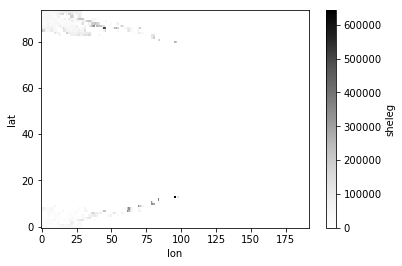

In [12]:
ds_surface_restart.sheleg.plot(cmap='Greys')

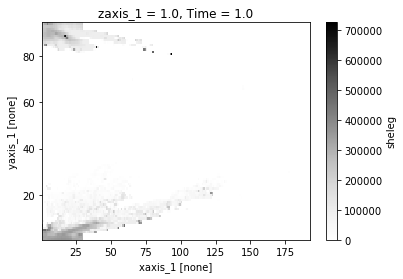

In [13]:
ds_sfc_ini_red_sheleg_ = ds_sfc_ini_red.sheleg*1000
ds_sfc_ini_red_sheleg_.plot(cmap='Greys')

Hence the sheleg values going in the model have to be multiplied with 1000

# 2. Snwdph - actual snow depth (mm) over land/sea ice

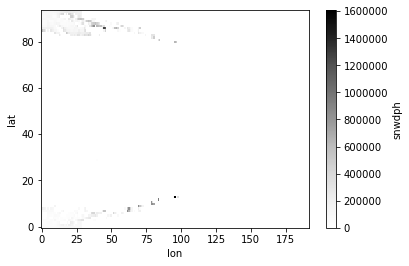

In [14]:
ds_surface_restart.snwdph.plot(cmap='Greys')

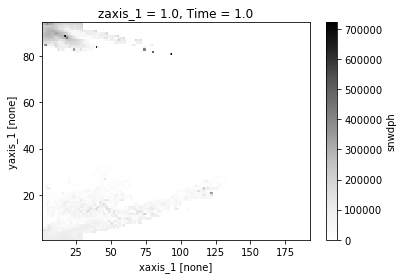

In [15]:
ds_sfc_ini_red_snwdph_ = ds_sfc_ini_red.snwdph*100
ds_sfc_ini_red_snwdph_.plot(cmap='Greys')

# 3. Tskin ground surface skin temperature

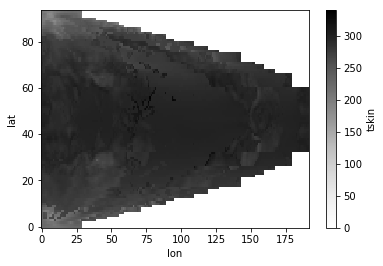

In [16]:
ds_surface_restart.tskin.plot(cmap='Greys')

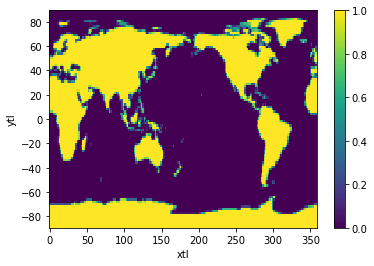

In [17]:
area_lnd = ds_grid_spec['AREA_LND']
area_lnd_cell = ds_grid_spec['AREA_LND_CELL']
frac = area_lnd/area_lnd_cell
frac.plot()

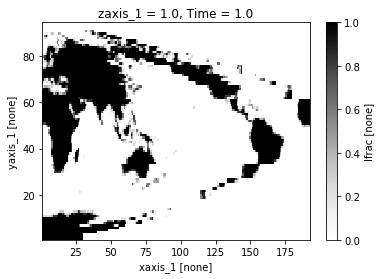

In [18]:
# To do tskin
lfrac = ds_sfc_ini_red.lfrac
ofrac = 1 - lfrac
lfrac.plot(cmap='Greys')

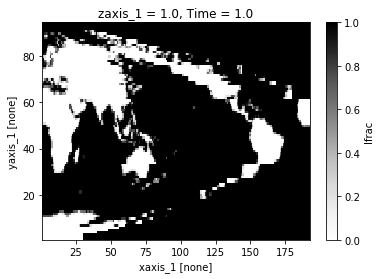

In [19]:
ofrac.plot(cmap='Greys')

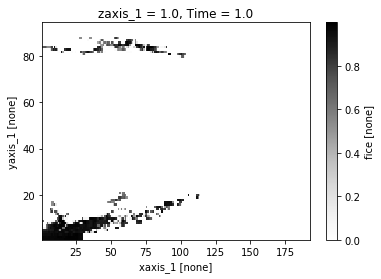

In [20]:
ds_sfc_ini_red.fice.plot(cmap='Greys')

In [21]:
#if ofrac>0:
#    fwater = 1 - fice
fwater = np.zeros(ds_sfc_ini_red.fice.shape)
for i in range(fwater.shape[2]):
    for j in range(fwater.shape[3]):
        if ofrac[0,0,i,j].values.flatten()[0]>0.0:
            fwater[0,0,i,j] = 1 - ds_sfc_ini_red.fice[0,0,i,j].values.flatten()[0]

In [22]:
ds_sfc_ini_red['fwater'] = (('Time', 'zaxis_1', 'yaxis_1', 'xaxis_1'), fwater)

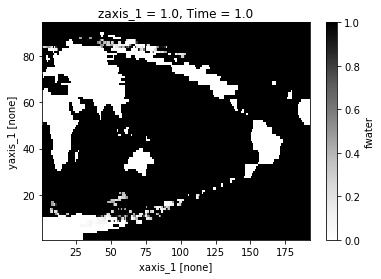

In [23]:
ds_sfc_ini_red.fwater.plot(cmap='Greys')

In [26]:
#ds_sfc_ini_red['tskin'] = 

In [25]:
tskin = np.zeros(ds_sfc_ini_red.fice.shape)
tsea   = ds_sfc_ini_red.tsea.values
twater = ds_sfc_ini_red.tsea.values
ofrac_ = ofrac.values
fwater_ = ds_sfc_ini_red.fwater.values
tice_ = ds_sfc_ini_red.tisfc.values
fice_ = ds_sfc_ini_red.fice.values


for i in range(fwater.shape[2]):
    for j in range(fwater.shape[3]):
        if lfrac[0,0,i,j].values.flatten()[0]>0.0:
           # print('test')
            tskin[0,0,i,j] = (tsea[0,0,i,j]- twater[0,0,i,j]*ofrac_[0,0,i,j]*fwater_[0,0,i,j] - tice_[0,0,i,j]*ofrac_[0,0,i,j]*fice_[0,0,i,j])/(lfrac[0,0,i,j].values.flatten()[0])

In [27]:
ds_sfc_ini_red['tskin'] = (('Time', 'zaxis_1', 'yaxis_1', 'xaxis_1'), tskin)

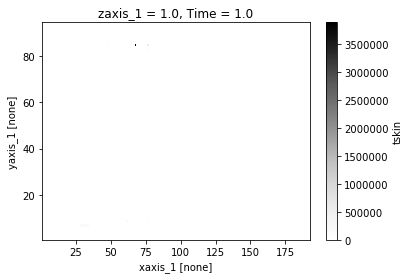

In [28]:
ds_sfc_ini_red.tskin.plot(cmap='Greys')

# 4. smc - soil volumetric water content (fraction)

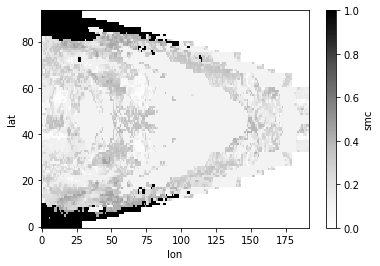

In [29]:
ds_surface_restart.smc.isel(lev=-1).plot(cmap='Greys')

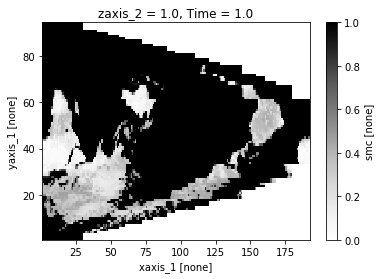

In [32]:
ds_sfc_ini_red.smc.isel(zaxis_2=0).plot(cmap='Greys')

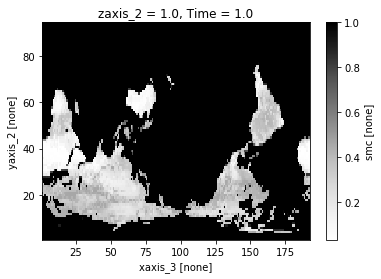

In [33]:
ds_sfc_ini.smc.isel(zaxis_2=0).plot(cmap='Greys')

# 5. stc - Soil temperature in K

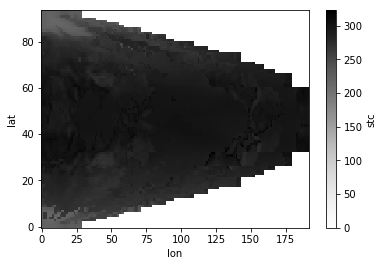

In [34]:
ds_surface_restart.stc.isel(lev=0).plot(cmap='Greys')

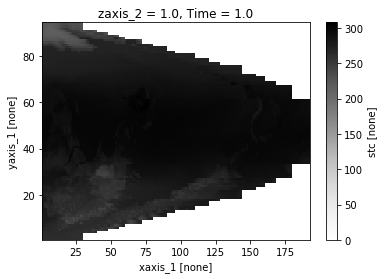

In [35]:
ds_sfc_ini_red.stc.isel(zaxis_2=0).plot(cmap='Greys')

Same problem

# 6. slc - liquid soil moisture content (fraction)

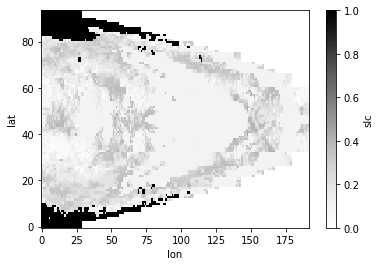

In [36]:
ds_surface_restart.slc.isel(lev=0).plot(cmap='Greys')

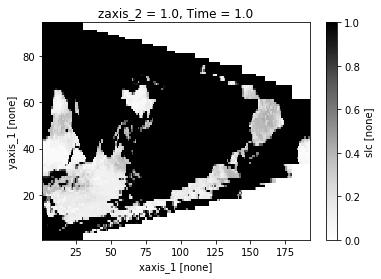

In [37]:
ds_sfc_ini_red.slc.isel(zaxis_2=0).plot(cmap='Greys')

# 7. Canopy - canopy water in m

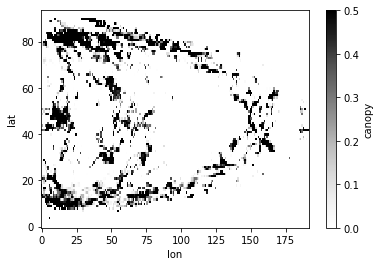

In [38]:
ds_surface_restart.canopy.plot(cmap='Greys')

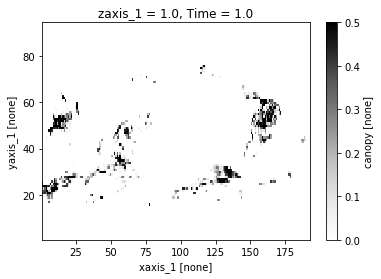

In [39]:
ds_sfc_ini_red.canopy.plot(cmap='Greys')

# 8. Trans - total plant transpiration

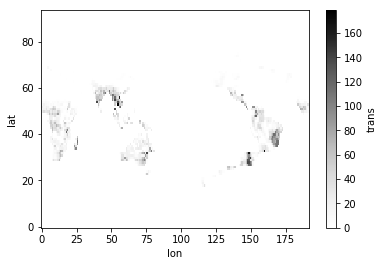

In [40]:
ds_surface_restart.trans.plot(cmap='Greys')

In [41]:
ds_trans_era5

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 1801, longitude: 3600, time: 1)
Coordinates:
  * time       (time) datetime64[ns] 2009-01-01T11:30:00
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    evavt      (time, latitude, longitude) float64 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.3 (http://m...
    Conventions:               CF-1.6
    history:                   Fri May 01 12:10:27 2020: cdo seltimestep,1 ev...
    frequency:                 day
    NCO:                       netCDF Operators version 4.7.4-beta01 (http://...
    nco_openmp_thread_number:  1
    CDO:                       Climate Data Operators version 1.9.3 (http://m...

In [42]:
ev = ds_trans_era5.evavt.values
ev[ev<0] = 0.0
ds_trans_era5['evavt_2'] = (('time', 'latitude', 'longitude'), ev)
#ev.plot()

/home/manmeet/anaconda3/envs/py35/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


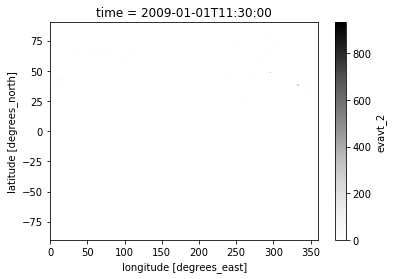

In [43]:
evav_2 = ds_trans_era5.evavt_2*1000000
evav_2.plot(cmap='Greys')

In [44]:
np.max(ds_trans_era5.evavt_2)

<xarray.DataArray 'evavt_2' ()>
array(0.000931)

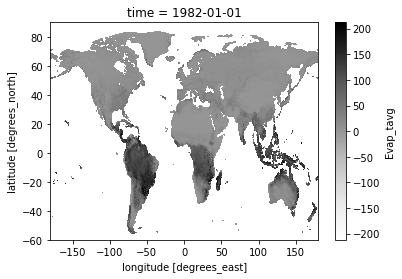

In [27]:
ev_merra5 = ds_merra5.Evap_tavg*2.501e+6
ev_merra5.plot(cmap='Greys')

In [28]:
print(np.min(ev_merra5), np.max(ev_merra5))

<xarray.DataArray 'Evap_tavg' ()>
array(-5.425653) <xarray.DataArray 'Evap_tavg' ()>
array(212.163712)


In [29]:
ev_merra5

<xarray.DataArray 'Evap_tavg' (time: 1, Y: 1500, X: 3600)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01
  * X        (X) float64 -179.9 -179.8 -179.8 -179.6 ... 179.7 179.8 179.9 180.0
  * Y        (Y) float64 -59.95 -59.85 -59.75 -59.65 ... 89.65 89.75 89.85 89.95

In [30]:
ev = ev_merra5.values
ev[ev<0] = 0.0
ev_merra5['trans'] = (('time', 'Y', 'X'), ev)

/home/manmeet/anaconda3/envs/py35/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


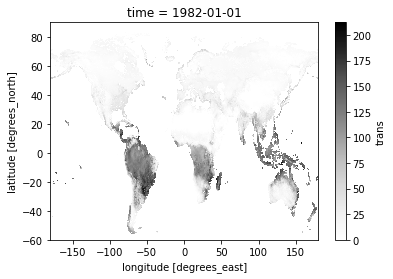

In [31]:
ev_merra5.trans.plot(cmap='Greys')

In [32]:
ds_out = xr.Dataset({'lat': (['lat'], ds_grid_spec.ytl),
                     'lon': (['lon'], ds_grid_spec.xtl),
                    }
                   )
ev_merra5_ = ev_merra5.rename({
  "Y": "lat",
  "X": "lon",
})

In [33]:
regridder = xe.Regridder(ev_merra5_, ds_out, 'bilinear')

Overwrite existing file: bilinear_1500x3600_94x192.nc 
 You can set reuse_weights=True to save computing time.


In [34]:
ev_merra5_o = regridder(ev_merra5_.trans)

/home/manmeet/anaconda3/envs/py35/lib/python3.7/site-packages/xarray/core/dataarray.py:218: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(data, pd.Panel):


In [35]:
ev_merra5_o

<xarray.DataArray 'trans' (time: 1, lat: 94, lon: 192)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 -88.54 -86.65 -84.75 -82.85 ... 84.75 86.65 88.54
Attributes:
    regrid_method:  bilinear

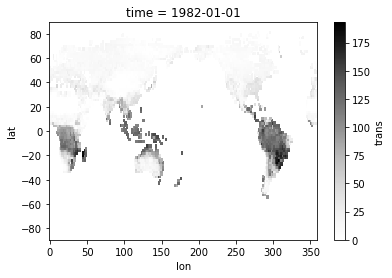

In [36]:
ev_merra5_o.plot(cmap='Greys')

In [37]:
print(np.min(ev_merra5_o), np.max(ev_merra5_o))

<xarray.DataArray 'trans' ()>
array(0.) <xarray.DataArray 'trans' ()>
array(192.934935)


In [38]:
ev_merra5_o.to_netcdf('trans.nc', format='NETCDF3_CLASSIC')

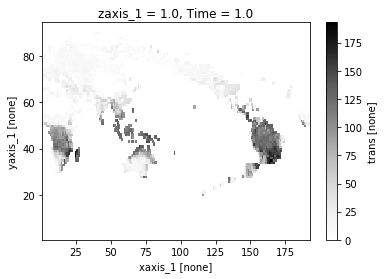

In [47]:
# transformed to reduced gaussian grid
ds_sfc_ini_red.trans.plot(cmap='Greys')

# 9. Sncovr - Snow cover over land

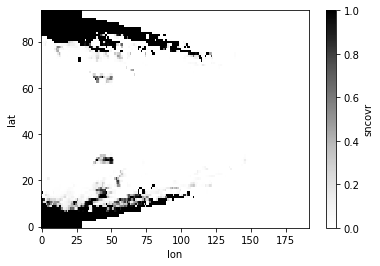

In [48]:
ds_surface_restart.sncovr.plot(cmap='Greys')

Download snow cover data from ERA5 as it is not in CFSR, and then multiply it with the lfrac to get 
snow cover over land

In [49]:
ds_snowcvr_era5

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 1801, longitude: 3600, time: 1)
Coordinates:
  * time       (time) datetime64[ns] 2009-01-01T11:30:00
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    snowc      (time, latitude, longitude) float64 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.3 (http://m...
    Conventions:               CF-1.6
    history:                   Fri May 01 12:10:43 2020: cdo seltimestep,1 sn...
    frequency:                 day
    NCO:                       netCDF Operators version 4.7.4-beta01 (http://...
    nco_openmp_thread_number:  1
    CDO:                       Climate Data Operators version 1.9.3 (http://m...

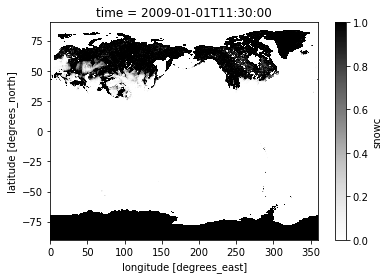

In [50]:
snowc = ds_snowcvr_era5.snowc / 100
snowc.plot(cmap='Greys')

In [42]:
print(ds_grid_spec.xtl)
print(ds_grid_spec.ytl)

<xarray.DataArray 'xtl' (xtl: 192)>
array([  0.   ,   1.875,   3.75 ,   5.625,   7.5  ,   9.375,  11.25 ,  13.125,
        15.   ,  16.875,  18.75 ,  20.625,  22.5  ,  24.375,  26.25 ,  28.125,
        30.   ,  31.875,  33.75 ,  35.625,  37.5  ,  39.375,  41.25 ,  43.125,
        45.   ,  46.875,  48.75 ,  50.625,  52.5  ,  54.375,  56.25 ,  58.125,
        60.   ,  61.875,  63.75 ,  65.625,  67.5  ,  69.375,  71.25 ,  73.125,
        75.   ,  76.875,  78.75 ,  80.625,  82.5  ,  84.375,  86.25 ,  88.125,
        90.   ,  91.875,  93.75 ,  95.625,  97.5  ,  99.375, 101.25 , 103.125,
       105.   , 106.875, 108.75 , 110.625, 112.5  , 114.375, 116.25 , 118.125,
       120.   , 121.875, 123.75 , 125.625, 127.5  , 129.375, 131.25 , 133.125,
       135.   , 136.875, 138.75 , 140.625, 142.5  , 144.375, 146.25 , 148.125,
       150.   , 151.875, 153.75 , 155.625, 157.5  , 159.375, 161.25 , 163.125,
       165.   , 166.875, 168.75 , 170.625, 172.5  , 174.375, 176.25 , 178.125,
       180.   , 

In [43]:
ds_snowcvr_era5

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 1801, longitude: 3600, time: 1)
Coordinates:
  * time       (time) datetime64[ns] 2009-01-01T11:30:00
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    snowc      (time, latitude, longitude) float64 nan nan nan ... 100.0 100.0
Attributes:
    CDI:                       Climate Data Interface version 1.9.3 (http://m...
    Conventions:               CF-1.6
    history:                   Fri May 01 12:10:43 2020: cdo seltimestep,1 sn...
    frequency:                 day
    NCO:                       netCDF Operators version 4.7.4-beta01 (http://...
    nco_openmp_thread_number:  1
    CDO:                       Climate Data Operators version 1.9.3 (http://m...

In [44]:
ds_out = xr.Dataset({'lat': (['lat'], ds_grid_spec.ytl),
                     'lon': (['lon'], ds_grid_spec.xtl),
                    }
                   )
ds_snowcvr_era5_ = ds_snowcvr_era5.rename({
  "latitude": "lat",
  "longitude": "lon",
})

In [45]:
regridder = xe.Regridder(ds_snowcvr_era5_.snowc, ds_out, 'bilinear')

Overwrite existing file: bilinear_1801x3600_94x192.nc 
 You can set reuse_weights=True to save computing time.


In [46]:
ds_snowcvr_era5_o = regridder(ds_snowcvr_era5_.snowc)

/home/manmeet/anaconda3/envs/py35/lib/python3.7/site-packages/xarray/core/dataarray.py:218: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(data, pd.Panel):


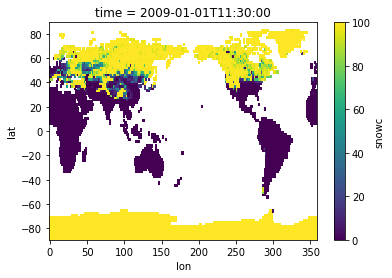

In [47]:
ds_snowcvr_era5_o.plot()

In [48]:
ds_snowcvr_era5_o_ = ds_snowcvr_era5_o/100

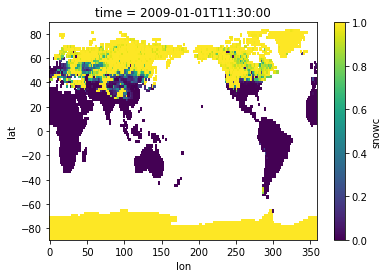

In [49]:
ds_snowcvr_era5_o_.plot()

In [50]:
ds_snowcvr_era5_o_.to_netcdf('snowc.nc', format='NETCDF3_CLASSIC')

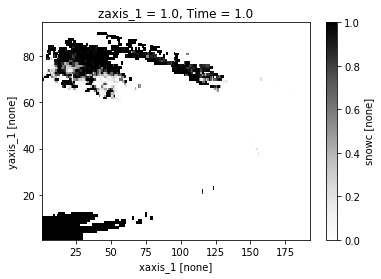

In [51]:
ds_sfc_ini_red.snowc.plot(cmap='Greys')

# 10. zorl_o

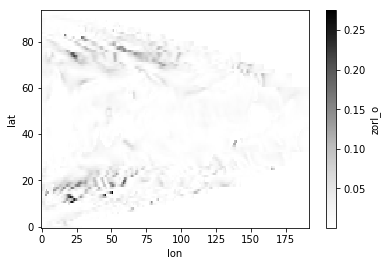

In [52]:
ds_surface_restart.zorl_o.plot(cmap='Greys')

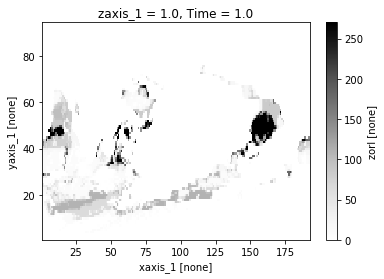

In [53]:
ds_sfc_ini_red.zorl.plot(cmap='Greys')

# 11. hice

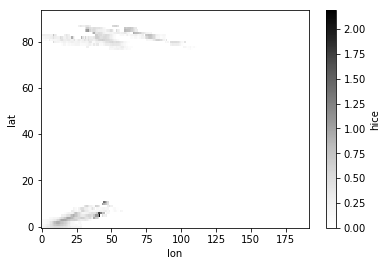

In [54]:
ds_surface_restart.hice.plot(cmap='Greys')

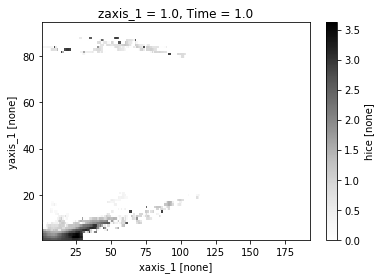

In [25]:
ds_sfc_ini_red.hice.plot(cmap='Greys')

# 12. hsnow - Snow Thickness over Sea-Ice

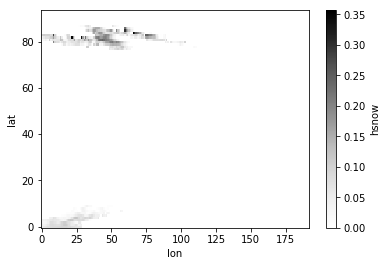

In [26]:
ds_surface_restart.hsnow.plot(cmap='Greys')

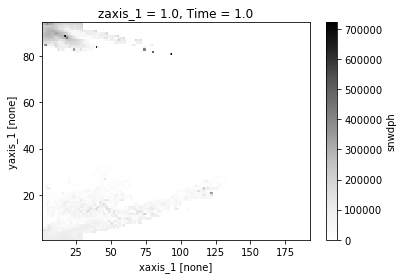

In [55]:
ds_sfc_ini_red_snwdph_.plot(cmap='Greys')

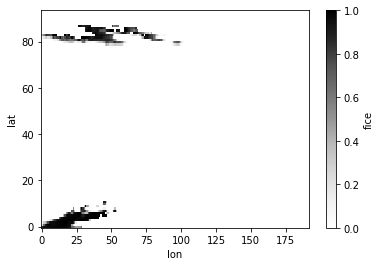

In [56]:
ds_surface_restart.fice.plot(cmap='Greys')

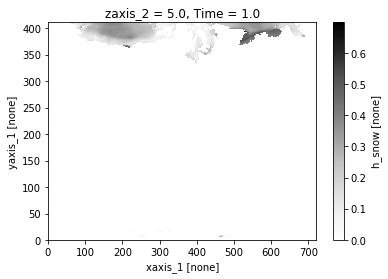

In [67]:
ds_ice.h_snow.isel(zaxis_2=-1).plot(cmap='Greys')

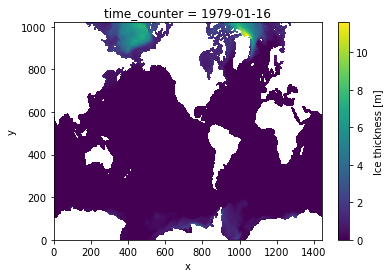

In [76]:
ds_oras4.iicethic.plot()

# 13. fwater

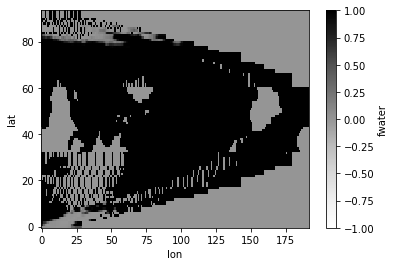

In [27]:
ds_surface_restart.fwater.plot(cmap='Greys')

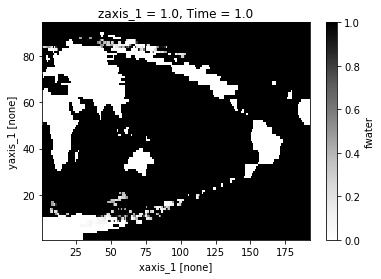

In [59]:
fwater = np.zeros(ds_sfc_ini_red.fice.shape)
for i in range(fwater.shape[2]):
    for j in range(fwater.shape[3]):
        if ofrac[0,0,i,j].values.flatten()[0]>0.0:
            fwater[0,0,i,j] = 1 - ds_sfc_ini_red.fice[0,0,i,j].values.flatten()[0]
ds_sfc_ini_red['fwater'] = (('Time', 'zaxis_1', 'yaxis_1', 'xaxis_1'), fwater)
ds_sfc_ini_red.fwater.plot(cmap='Greys')

# 14. fice

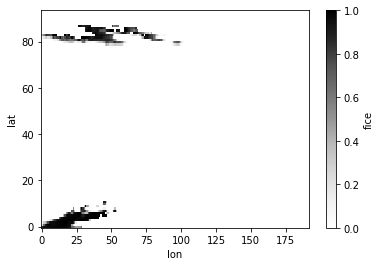

In [28]:
ds_surface_restart.fice.plot(cmap='Greys')

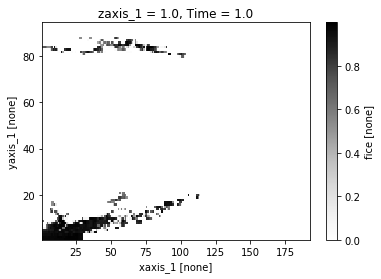

In [29]:
ds_sfc_ini_red.fice.plot(cmap='Greys')

# 15. tice_r

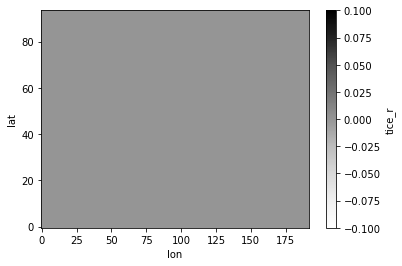

In [30]:
ds_surface_restart.tice_r.plot(cmap='Greys')

In [31]:
np.sum(ds_surface_restart.tice_r)

<xarray.DataArray 'tice_r' ()>
array(0.)

# 16. tice

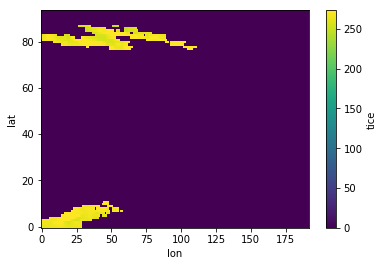

In [32]:
ds_surface_restart.tice.plot()

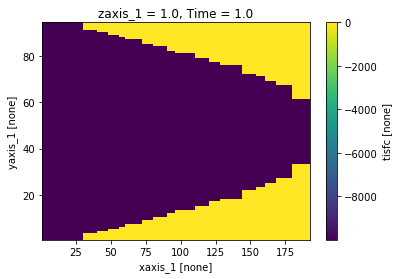

In [33]:
ds_sfc_ini_red.tisfc.plot()

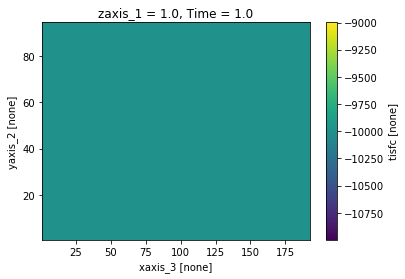

In [66]:
ds_sfc_ini.tisfc.plot()

In [69]:
np.min(ds_sfc_ini.tisfc)

<xarray.DataArray 'tisfc' ()>
array(-9999.)

# 17. twater

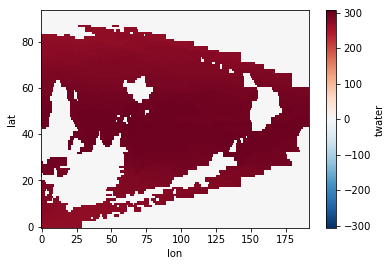

In [49]:
ds_surface_restart.twater.plot()

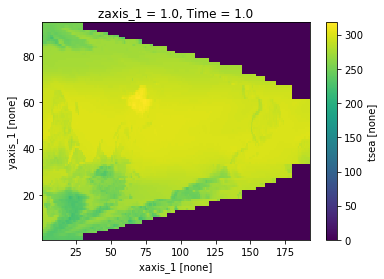

In [43]:
ds_sfc_ini_red.tsea.plot()

In [47]:
print(np.min(ds_surface_restart.twater))
print(np.max(ds_surface_restart.twater))
print(np.min(ds_sfc_ini_red.tsea))

<xarray.DataArray 'twater' ()>
array(-0.814993)
<xarray.DataArray 'twater' ()>
array(306.322059)
<xarray.DataArray 'tsea' ()>
array(0.)


In [59]:
ds_surface_restart_ = ds_surface_restart.twater.copy()
for i in range(ds_surface_restart_.shape[0]):
    for j in range(ds_surface_restart_.shape[1]):
        if ds_surface_restart.twater[i,j] > 0:
            ds_surface_restart_[i,j] = ds_sfc_ini_red.tsea[0,0,i,j]

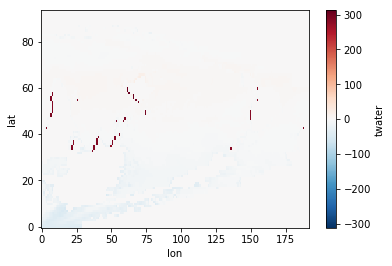

In [60]:
(ds_surface_restart_ - ds_surface_restart.twater).plot()

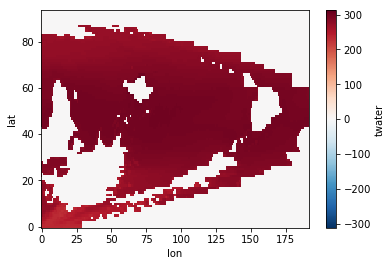

In [61]:
ds_surface_restart_.plot()

# 18. twater_r

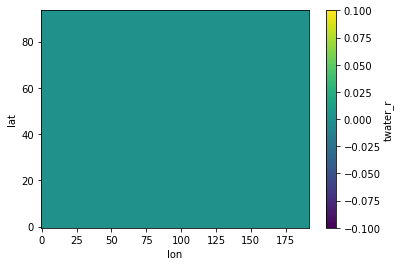

In [36]:
ds_surface_restart.twater_r.plot()

In [1]:
!pwd

/home/manmeet/spec2d
